In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import njit,prange
import random
from collections import Counter
from KC_methods import calc_KC76, calc_KC78, calc_plotnik, comp_from_ctw

In [11]:
s ="01010101010101011110100101010100101"
print(comp_from_ctw(s))
print(calc_plotnik(s))
print(calc_KC76(s))

26.683170289974488
1.7548875021634682
35.904981118614764


In [12]:
methods = {
    "LZ78":calc_KC78,
    "LZ76": calc_KC76,
    "CTW": comp_from_ctw,
    "PLT": calc_plotnik
}

In [13]:
from itertools import product
import  matplotlib.pyplot as plt
from collections import defaultdict
res = []
reses = defaultdict(list)
from tqdm.notebook import tqdm

length = 20

sequences = list(product(["0","1"],repeat=length))



In [14]:
reses = defaultdict(list)
print(len(sequences))
import multiprocessing.dummy as mp 

def get_comps(method):
    res = []
    for perm in tqdm(sequences, desc=method):
        seq = "".join(perm)
        res.append(methods[method](seq))
    return res

p = mp.Pool(4)
final_results = p.map(get_comps,methods)
p.close()
p.join()

1048576


LZ78:   0%|          | 0/1048576 [00:00<?, ?it/s]

LZ76:   0%|          | 0/1048576 [00:00<?, ?it/s]

CTW:   0%|          | 0/1048576 [00:00<?, ?it/s]

PLT:   0%|          | 0/1048576 [00:00<?, ?it/s]

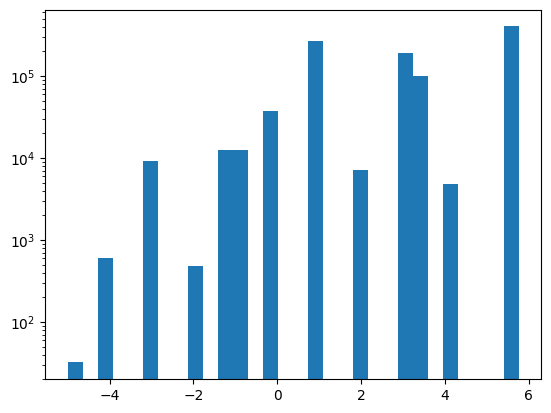

In [15]:
len(final_results)
final_results[2]
import matplotlib.pyplot as plt
names = list(methods.keys())
for i in range(len(final_results)):
    x = final_results[i]
    m = names[i]
    bins = 30
    plt.clf()
    plt.hist(x, bins=bins)
    plt.yscale('log')
    plt.savefig(f"results/hist/{m}_{bins}.jpg")